In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 30 21:34:23 2019

@author: Vanshika
"""
import sys, os
import pandas as pd
import numpy as np
#import cv2
#import json
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam


from keras.regularizers import l2
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

df=pd.read_csv('/content/drive/My Drive/minor5/datasets/fer2013/fer2013.csv')
# print(df.info())
# print(df["Usage"].value_counts())
# print(df.head())
X_train,train_y,X_test,test_y=[],[],[],[]
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


num_features = 64
num_labels = 7
batch_size = 64
epochs = 20
width, height = 48, 48
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_flat=np.argmax(train_y,axis=1)
class_weight=compute_class_weight('balanced',np.unique(y_flat),y_flat)
# print(f"shape:{X_train.shape}")
##designing the cnn
#1st convolution layer
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(16,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
#model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
#model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())
#fully connected neural networks
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

model.summary()

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])
checkpoint=ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/emotionDetector/models/model.h5",monitor='val_acc',mode='max',verbose=1,save_best_only=True,save_weights_only=False,period=1)
#Training the model
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True,
          class_weight=class_weight,
          callbacks=[checkpoint])
#Saving the  model to  use it later on
'''
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")
'''
#model.save("/content/drive/My Drive/Colab Notebooks/emotionDetector/models")

Using TensorFlow backend.


FileNotFoundError: ignored

In [ ]:
#Evaluation
train_score = model.evaluate(X_train, train_y , verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(X_test, test_y, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.09649195987935591
Train accuracy: 97.33533038420008
Test loss: 2.4284970368406307
Test accuracy: 55.391473951496494


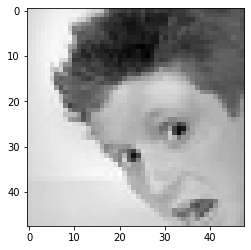

[2.7222325e-06 5.0561680e-14 2.4467097e-01 1.4768578e-01 2.9609345e-03
 2.5379042e-05 6.0465425e-01]


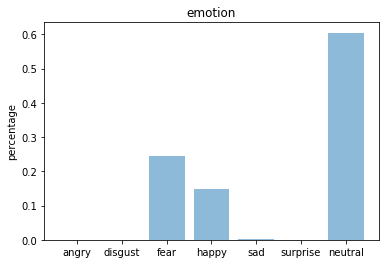

----------------------------------------------


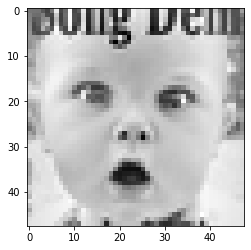

[6.7474154e-08 3.8134336e-09 9.2247762e-03 1.0347502e-05 9.2234587e-10
 9.9076474e-01 2.2584981e-08]


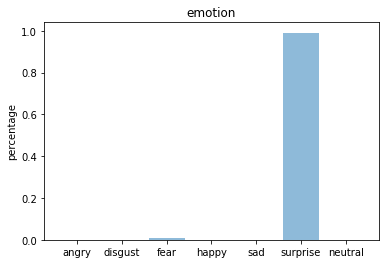

----------------------------------------------


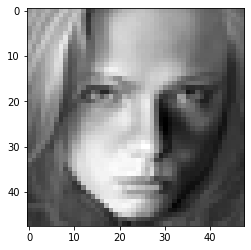

[8.4979957e-01 2.0020114e-07 8.7181464e-02 1.7076680e-02 4.5352280e-02
 6.1868635e-09 5.8983330e-04]


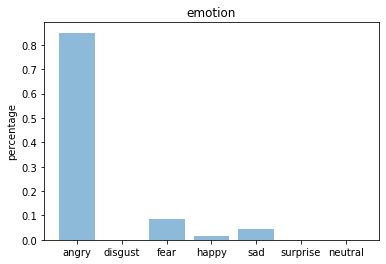

----------------------------------------------


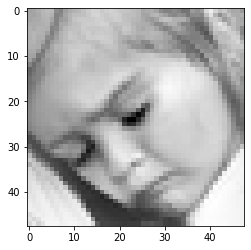

[3.1723283e-04 3.4923676e-07 9.4412446e-01 1.0568959e-02 4.4954907e-02
 2.4486608e-05 9.5546429e-06]


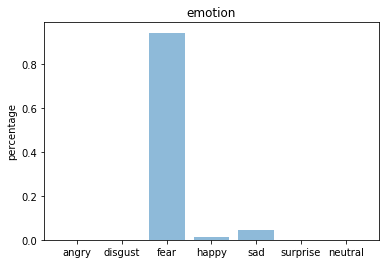

----------------------------------------------


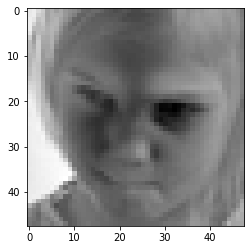

[1.8972458e-01 4.2450424e-07 6.5286082e-01 1.1971940e-03 2.1836186e-02
 8.9146072e-11 1.3438080e-01]


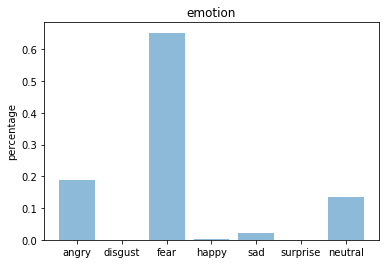

----------------------------------------------


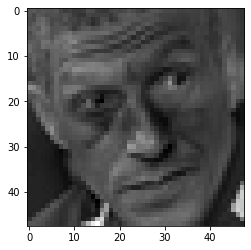

[4.9235839e-02 7.3827956e-05 3.6099723e-01 2.0706314e-03 5.4204261e-01
 3.2317134e-06 4.5576524e-02]


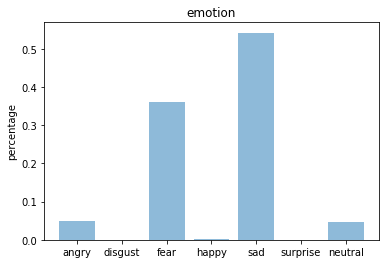

----------------------------------------------


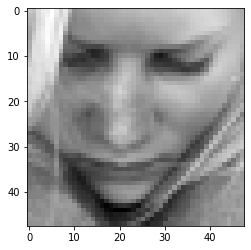

[3.1755300e-04 1.4386613e-07 1.4732033e-03 8.1790984e-04 9.4400269e-01
 2.6064979e-09 5.3388607e-02]


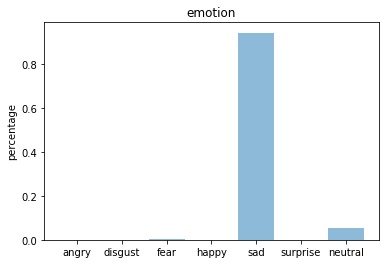

----------------------------------------------


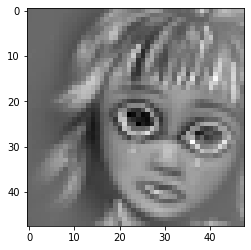

[1.8383498e-01 3.2807016e-14 8.1612623e-01 2.9419428e-07 2.4732828e-05
 1.9143833e-06 1.1845739e-05]


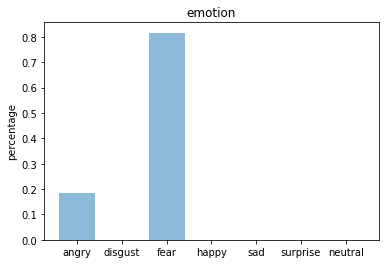

----------------------------------------------


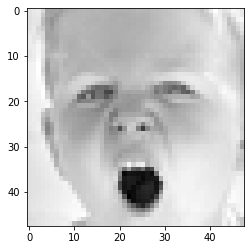

[5.4194403e-01 3.3440184e-10 2.0367285e-02 1.1189081e-06 9.6727131e-14
 4.3768758e-01 1.0966062e-12]


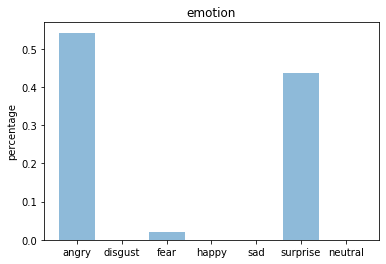

----------------------------------------------


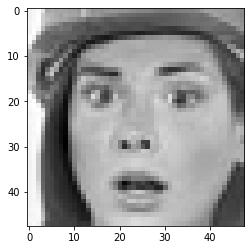

[1.4372043e-05 1.9189880e-08 1.0756287e-04 4.5766583e-08 1.2844248e-07
 9.9987781e-01 3.2661145e-08]


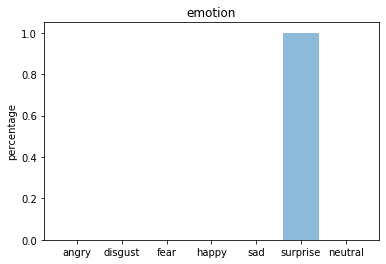

----------------------------------------------


In [ ]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(X_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(X_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			print(i)
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

In [ ]:
#Confusion Matrix.

from sklearn.metrics import classification_report, confusion_matrix
pred_list = []; actual_list = []
for i in predictions:
  pred_list.append(np.argmax(i))
for i in test_y:
  actual_list.append(np.argmax(i))
confusion_matrix(actual_list, pred_list)



array([[217,   3,  76,  27,  75,  12,  57],
       [ 17,  22,   8,   1,   7,   0,   1],
       [ 53,   3, 216,  17,  93,  46,  68],
       [ 38,   0,  35, 675,  55,  25,  67],
       [ 87,   2, 112,  40, 286,   8, 118],
       [ 15,   0,  62,  21,  20, 276,  21],
       [ 61,   0,  72,  59, 114,   5, 296]])

In [ ]:
}|ef emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

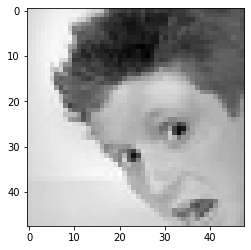

[0.13575946 0.01018618 0.18138601 0.0283112  0.42746028 0.02990273
 0.18699418]


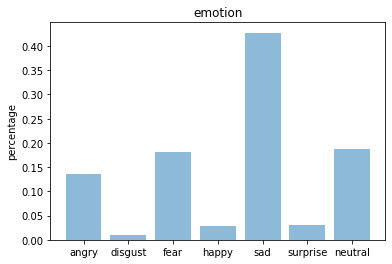

----------------------------------------------


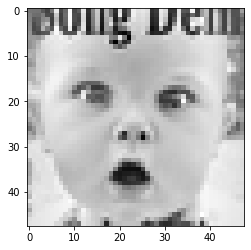

[1.5701521e-02 4.4062469e-04 3.7630346e-02 8.0570760e-05 2.3501572e-04
 9.4551927e-01 3.9268687e-04]


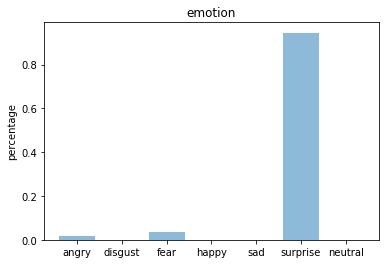

----------------------------------------------


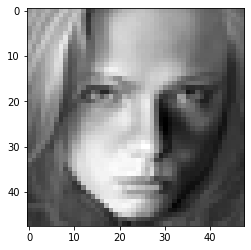

[0.183168   0.00620577 0.16735825 0.09392656 0.29032695 0.00561843
 0.25339606]


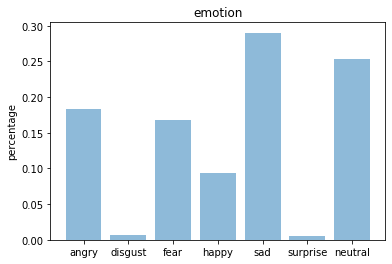

----------------------------------------------


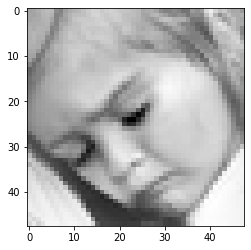

[0.05837791 0.00284977 0.22515453 0.01662885 0.4739014  0.01369394
 0.2093936 ]


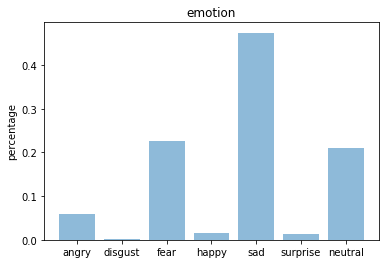

----------------------------------------------


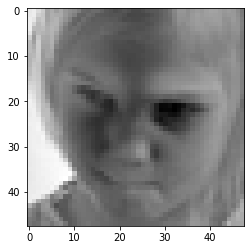

[0.3664337  0.00740298 0.11063563 0.04131018 0.2453897  0.00748081
 0.22134703]


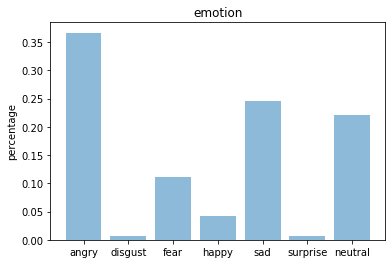

----------------------------------------------


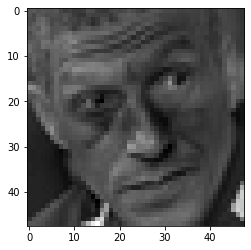

[0.12840502 0.00364516 0.11406058 0.06300381 0.28336948 0.03664559
 0.3708704 ]


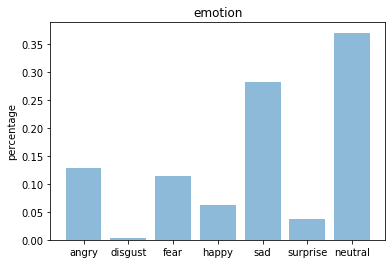

----------------------------------------------


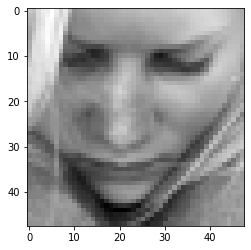

[0.07875212 0.0325114  0.16464642 0.12814339 0.48965347 0.00929354
 0.09699973]


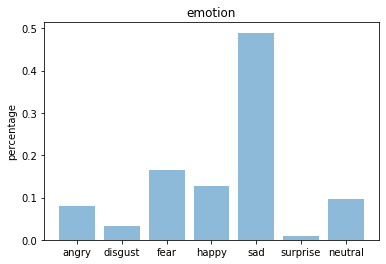

----------------------------------------------


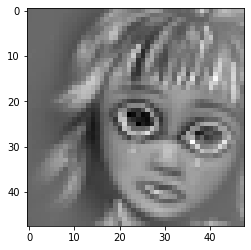

[0.07985775 0.00782376 0.20664836 0.20313707 0.15366115 0.21333377
 0.1355382 ]


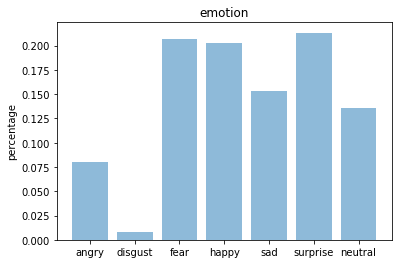

----------------------------------------------


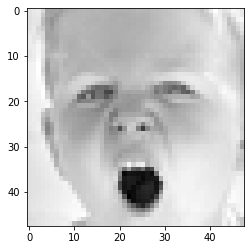

[0.44022542 0.0084042  0.14899682 0.00180695 0.00526537 0.39373147
 0.00156974]


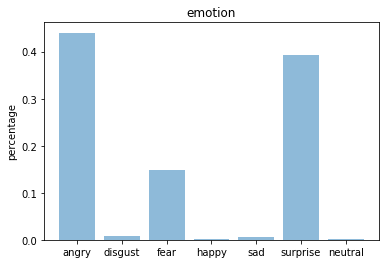

----------------------------------------------


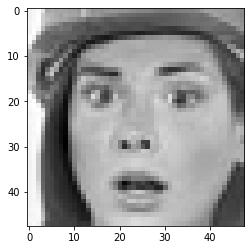

[9.6909283e-03 4.9173192e-04 1.1575212e-01 4.4248445e-04 2.0593889e-03
 8.6918688e-01 2.3764058e-03]


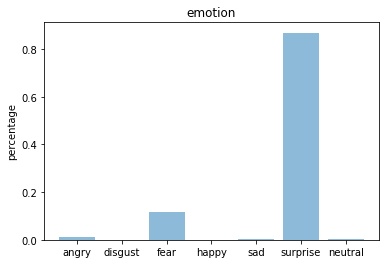

----------------------------------------------


In [ ]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(X_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(X_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			print(i)
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


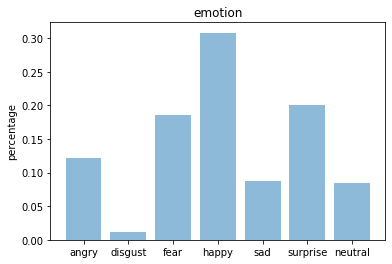

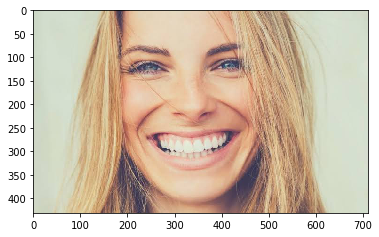

In [ ]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/drive/My Drive/Colab Notebooks/emotionDetector/images1.jfif'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


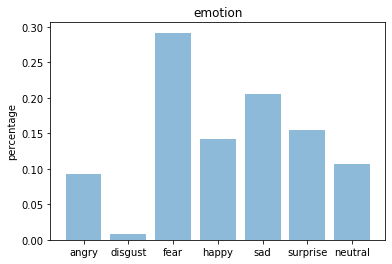

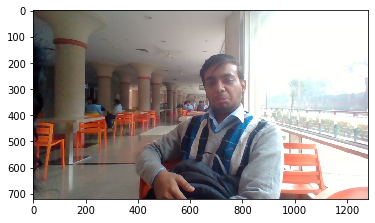

In [ ]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/drive/My Drive/Colab Notebooks/emotionDetector/.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


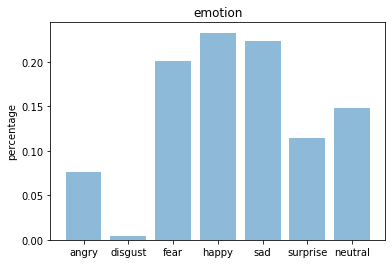

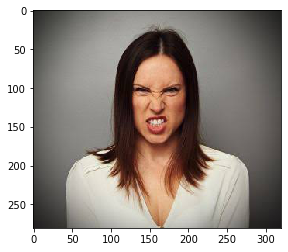

In [ ]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/drive/My Drive/Colab Notebooks/emotionDetector/angry.jfif'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255
x = np.array(x, 'float32')
x = x.reshape([1,48, 48,1]);

custom = model.predict(x)
emotion_analysis(custom[0])

plt.gray()
plt.imshow(true_image)
plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


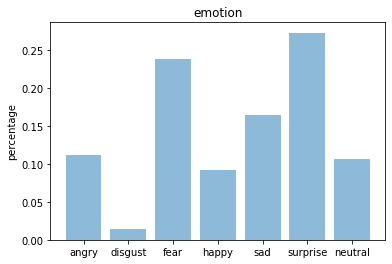

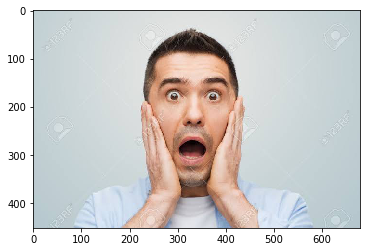

In [ ]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/drive/My Drive/Colab Notebooks/emotionDetector/fear.jfif'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255
x = np.array(x, 'float32')
x = x.reshape([1,48, 48 , 1]);
custom = model.predict(x)
emotion_analysis(custom[0])

plt.gray()
plt.imshow(true_image)
plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


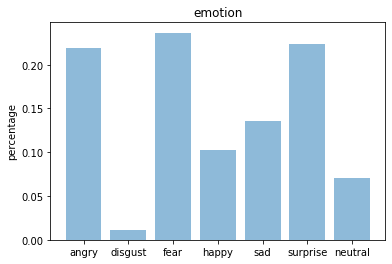

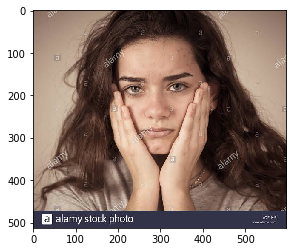

In [ ]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/drive/My Drive/Colab Notebooks/emotionDetector/sadd.jfif'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255
x = np.array(x, 'float32')
x = x.reshape([1,48, 48 , 1]);
custom = model.predict(x)
emotion_analysis(custom[0])

plt.gray()
plt.imshow(true_image)
plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


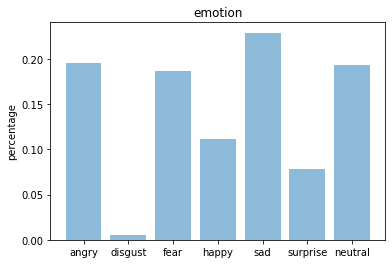

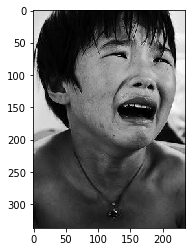

In [ ]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/drive/My Drive/Colab Notebooks/emotionDetector/sad5.jfif'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255
x = np.array(x, 'float32')
x = x.reshape([1,48, 48 , 1]);
custom = model.predict(x)
emotion_analysis(custom[0])

plt.gray()
plt.imshow(true_image)
plt.show()